In [62]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')

/tmp/ipykernel_6153/4102998519.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [63]:
# Define a range for x
x_range = np.linspace(-2, 2, 2001)

# Function (as a function)
def custom_function(x):
    return 2 * x ** 2 - 2 * x + 3

# Derivative function
def custom_derivative(x):
    return 4 * x - 2


In [64]:
# Random starting point
initial_point = np.random.choice(x_range, 1)
initial_value = initial_point[:]  # Store the initial value

# Learning parameters
fixed_learning_rate = 0.01
training_epochs_fixed = 50

# Run through training and store all the results
fixed_learning_params = np.zeros((training_epochs_fixed, 3))
for i in range(training_epochs_fixed):
    
    # Compute gradient
    gradient = custom_derivative(initial_point)

    # Fixed learning rate
    lr = fixed_learning_rate

    # Update parameter according to gradient descent
    initial_point = initial_point - lr * gradient

    # Store the parameters
    fixed_learning_params[i, 0] = initial_point
    fixed_learning_params[i, 1] = gradient
    fixed_learning_params[i, 2] = lr


/tmp/ipykernel_6153/173293584.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fixed_learning_params[i, 0] = initial_point
/tmp/ipykernel_6153/173293584.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fixed_learning_params[i, 1] = gradient


In [65]:
# Random starting point
initial_point = np.random.choice(x_range, 1)
initial_value = initial_point[:]  # Store the initial value

# Learning parameters
fixed_learning_rate = 0.01
training_epochs_gradient = 50

# Run through training and store all the results
gradient_learning_params = np.zeros((training_epochs_gradient, 3))
for i in range(training_epochs_gradient):
    
    # Compute gradient
    gradient = custom_derivative(initial_point)

    # Adapt the learning rate according to the gradient
    lr = fixed_learning_rate * np.abs(gradient)

    # Update parameter according to gradient descent
    initial_point = initial_point - lr * gradient

    # Store the parameters
    gradient_learning_params[i, 0] = initial_point
    gradient_learning_params[i, 1] = gradient
    gradient_learning_params[i, 2] = lr


/tmp/ipykernel_6153/3759842693.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 0] = initial_point
/tmp/ipykernel_6153/3759842693.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 1] = gradient
/tmp/ipykernel_6153/3759842693.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 2] = lr


In [66]:
# Redefine parameters
time_based_learning_rate = 0.1
initial_point = initial_value

# Learning parameters
training_epochs_time = 50

# Run through training and store all the results
time_learning_params = np.zeros((training_epochs_time, 3))
for i in range(training_epochs_time):
    gradient = custom_derivative(initial_point)
    lr = time_based_learning_rate * (1 - (i + 1) / training_epochs_time)
    initial_point = initial_point - lr * gradient
    time_learning_params[i, 0] = initial_point
    time_learning_params[i, 1] = gradient
    time_learning_params[i, 2] = lr


/tmp/ipykernel_6153/3310074786.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_learning_params[i, 0] = initial_point
/tmp/ipykernel_6153/3310074786.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_learning_params[i, 1] = gradient


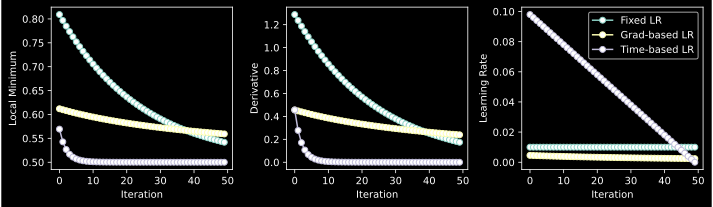

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Generate the plots
for i in range(3):
    ax[i].plot(fixed_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(gradient_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(time_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed LR', 'Grad-based LR', 'Time-based LR'])

plt.tight_layout()
plt.show()


## __Summary of Observations__

- This book explores two different methods of improving the convergence rate of gradient decent through first adjusting the learning rate based on the absolute value of the gradient first, and then by reducing the learning rate by introducing an inversely proportional relationship to the number of iterations
- Though the starting point is random, there are some common observations seen between running the notebook a few times to try to get different results. The first is that the time-based learning rate scheduling tends to converge to the minimum quicker than the other two methods, and that having a grad-based scheduling is still better at converging as compared to a fixed learning rate. The difference between the grad-based and time-based is mainly just due to the way that the scheduling functions are set up. We see that the time-based has a negative-linear decrease in the learning rate while the grad-based learning rate highly dependent on the value of the gradient itself. This means that depending on the initial value the grad-based method might do better or worse between runs while the time-based method gives more consistent results. If we change the relationship between the LR and gradient in the grad-based method we might get a better result, however this becomes subjective to the specific loss-landscape and initial values. Below I simply scaled the gradient factor by 2 and got better results in terms of iterations to convergence for the grad-based method. Again though, it becomes subjecting to the actual loss-landscape and in this case, it still performs worse than the time-based method. Regardless, having scheduling is still better than not as it not only reduces the number of iterations for convergence, but also helps to prevent overfitting once early stopping is implemented.

In [68]:
# Random starting point
initial_point = np.random.choice(x_range, 1)
initial_value = initial_point[:]  # Store the initial value

# Learning parameters
fixed_learning_rate = 0.01
training_epochs_gradient = 50

# Run through training and store all the results
gradient_learning_params = np.zeros((training_epochs_gradient, 3))
for i in range(training_epochs_gradient):
    
    # Compute gradient
    gradient = custom_derivative(initial_point)

    # Adapt the learning rate according to the gradient
    lr = fixed_learning_rate * np.abs(gradient) * 2

    # Update parameter according to gradient descent
    initial_point = initial_point - lr * gradient

    # Store the parameters
    gradient_learning_params[i, 0] = initial_point
    gradient_learning_params[i, 1] = gradient
    gradient_learning_params[i, 2] = lr


/tmp/ipykernel_6153/2065216522.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 0] = initial_point
/tmp/ipykernel_6153/2065216522.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 1] = gradient
/tmp/ipykernel_6153/2065216522.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 2] = lr


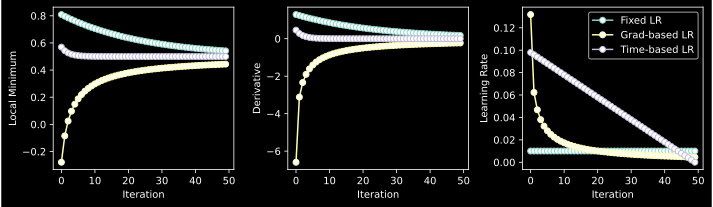

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Generate the plots
for i in range(3):
    ax[i].plot(fixed_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(gradient_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(time_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed LR', 'Grad-based LR', 'Time-based LR'])

plt.tight_layout()
plt.show()
